# Advanced Plotting
Here are some more sophisticated techniques for visualizing CEDAR data. 

In [12]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import madrigalWeb.madrigalWeb
import os

## RTI Plots of LP and AC Data


Download files: 

In [16]:
# Download the file that we need to run these examples
filename_lp = 'data/pfa20240108.001_lp_fit_01min.001.h5'
filename_ac = 'data/pfa20240108.001_ac_fit_01min.001.h5'

madrigalUrl='http://cedar.openmadrigal.org'
data = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)
user_fullname = 'username'
user_email = 'email@email.com'
user_affiliation = 'ABC'

if not os.path.exists(filename_lp): 
    url='/opt/cedar3/experiments4/2024/pfa/08jan24a/pfa20240108.001_lp_fit_01min.001.h5'
    print('Downloading data file...')

    file = data.downloadFile(url, filename_lp, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')

if not os.path.exists(filename_ac): 
    url='/opt/cedar3/experiments4/2024/pfa/08jan24a/pfa20240108.001_ac_fit_01min.001.h5'
    print('Downloading data file...')

    file = data.downloadFile(url, filename_ac, 
                               user_fullname, user_email, user_affiliation,'hdf5')    
    print('...Done!')

...Done!
...Done!


It is possible to create RTI plots of LP and AC data together to visualize the full profile.

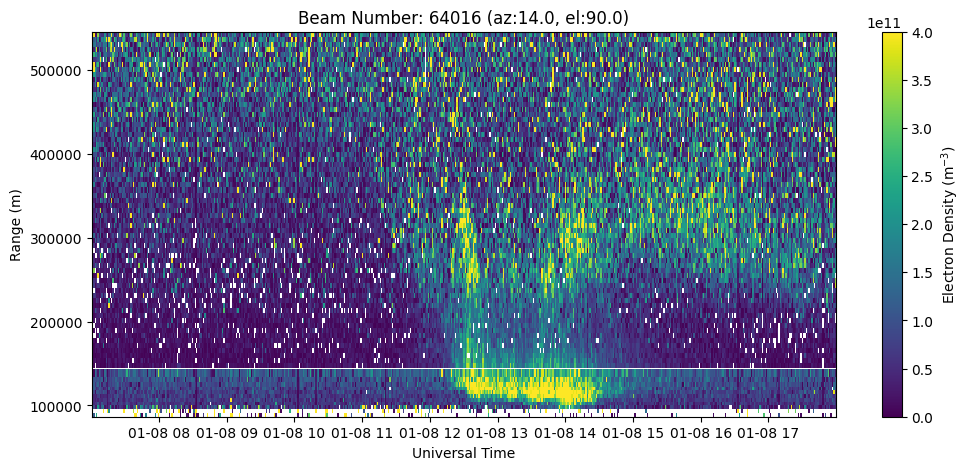

In [17]:
with h5py.File(filename_lp, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng_lp = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne_lp = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime_lp = np.array(h5['Data/Array Layout'][bidx]['timestamps'])


time_lp = utime_lp.astype('datetime64[s]')
ne_lp = ne_lp[:,np.isfinite(rng_lp)]
rng_lp = rng_lp[np.isfinite(rng_lp)]


with h5py.File(filename_ac, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng_ac = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne_ac = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    utime_ac = np.array(h5['Data/Array Layout'][bidx]['timestamps'])

    azm = h5['Data/Array Layout'][bidx]['1D Parameters']['azm'][0]
    elm = h5['Data/Array Layout'][bidx]['1D Parameters']['elm'][0]
    beamid = h5['Data/Array Layout'][bidx]['1D Parameters']['beamid'][0]


time_ac = utime_ac.astype('datetime64[s]')
ne_ac = ne_ac[:,np.isfinite(rng_ac)]
rng_ac = rng_ac[np.isfinite(rng_ac)]

cutoff_rng = 150.*1000.
aidx_ac = np.argmin(np.abs(rng_ac-cutoff_rng))
aidx_lp = np.argmin(np.abs(rng_lp-cutoff_rng))

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

c = ax.pcolormesh(time_ac, rng_ac[:aidx_ac], ne_ac[:,:aidx_ac].T, vmin=0., vmax=4.e11)
c = ax.pcolormesh(time_lp, rng_lp[aidx_lp:], ne_lp[:,aidx_lp:].T, vmin=0., vmax=4.e11)

ax.set_xlabel('Universal Time')
ax.set_ylabel('Range (m)')
ax.set_title('Beam Number: {:.0f} (az:{:.1f}, el:{:.1f})'.format(beamid, azm, elm))
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')


## Plot all ISR Parameters
Create a figure showing all four ISR parameters (Ne, Ti, Te, Vlos).

In [8]:
with h5py.File(filename_lp, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng_lp = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne_lp = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    te_lp = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['te']).T
    ti_lp = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ti']).T
    vlos_lp = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['vo']).T
    utime_lp = np.array(h5['Data/Array Layout'][bidx]['timestamps'])


time_lp = utime_lp.astype('datetime64[s]')
ne_lp = ne_lp[:,np.isfinite(rng_lp)]
te_lp = te_lp[:,np.isfinite(rng_lp)]
ti_lp = ti_lp[:,np.isfinite(rng_lp)]
vlos_lp = vlos_lp[:,np.isfinite(rng_lp)]
rng_lp = rng_lp[np.isfinite(rng_lp)]


with h5py.File(filename_ac, 'r') as h5:
    elms = []
    bmid = []
    for key in h5['Data/Array Layout'].keys():
        elms.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['elm'][0]))
        bmid.append(np.array(h5['Data/Array Layout'][key]['1D Parameters']['beamid'][0]))
    elms = np.array(elms)
    bmid = np.array(bmid)
    
    idx = np.argmax(elms)
    max_beam = bmid[idx]
    bidx = f'Array with beamid={max_beam} '

    rng_ac = np.array(h5['Data/Array Layout'][bidx]['range'])
    ne_ac = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ne']).T
    te_ac = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['te']).T
    ti_ac = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['ti']).T
    vlos_ac = np.array(h5['Data/Array Layout'][bidx]['2D Parameters']['vo']).T
    utime_ac = np.array(h5['Data/Array Layout'][bidx]['timestamps'])


time_ac = utime_ac.astype('datetime64[s]')
ne_ac = ne_ac[:,np.isfinite(rng_ac)]
te_ac = te_ac[:,np.isfinite(rng_ac)]
ti_ac = ti_ac[:,np.isfinite(rng_ac)]
vlos_ac = vlos_ac[:,np.isfinite(rng_ac)]
rng_ac = rng_ac[np.isfinite(rng_ac)]

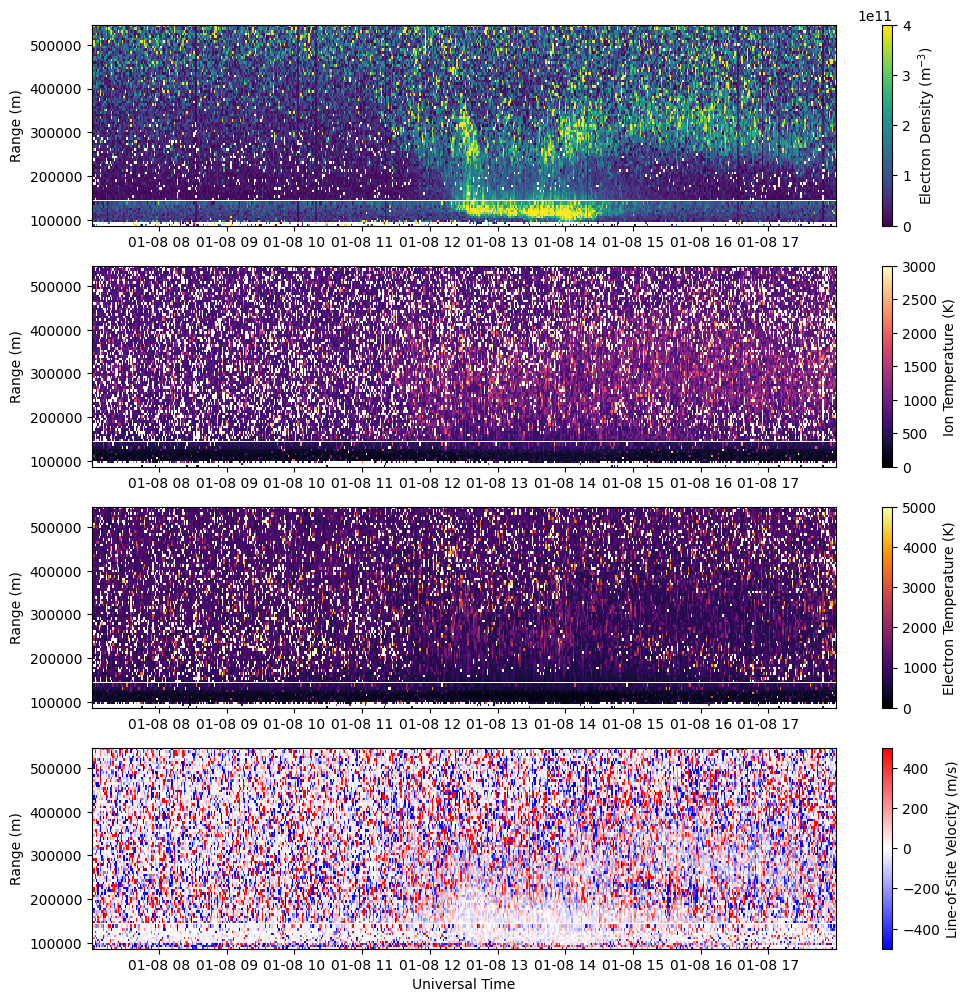

In [9]:
cutoff_rng = 150.*1000.
aidx_ac = np.argmin(np.abs(rng_ac-cutoff_rng))
aidx_lp = np.argmin(np.abs(rng_lp-cutoff_rng))

fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(4,1)

# Plot Electron Density
ax = fig.add_subplot(gs[0])
c = ax.pcolormesh(time_ac, rng_ac[:aidx_ac], ne_ac[:,:aidx_ac].T, vmin=0., vmax=4.e11, cmap='viridis')
c = ax.pcolormesh(time_lp, rng_lp[aidx_lp:], ne_lp[:,aidx_lp:].T, vmin=0., vmax=4.e11, cmap='viridis')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

# Plot Ion Temperature
ax = fig.add_subplot(gs[1])
c = ax.pcolormesh(time_ac, rng_ac[:aidx_ac], ti_ac[:,:aidx_ac].T, vmin=0., vmax=3.e3, cmap='magma')
c = ax.pcolormesh(time_lp, rng_lp[aidx_lp:], ti_lp[:,aidx_lp:].T, vmin=0., vmax=3.e3, cmap='magma')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Range (m)')
fig.colorbar(c, label=r'Ion Temperature (K)')

# Plot Electron Temperature
ax = fig.add_subplot(gs[2])
c = ax.pcolormesh(time_ac, rng_ac[:aidx_ac], te_ac[:,:aidx_ac].T, vmin=0., vmax=5.e3, cmap='inferno')
c = ax.pcolormesh(time_lp, rng_lp[aidx_lp:], te_lp[:,aidx_lp:].T, vmin=0., vmax=5.e3, cmap='inferno')
# ax.set_xlabel('Universal Time')
ax.set_ylabel('Range (m)')
fig.colorbar(c, label=r'Electron Temperature (K)')

# Plot Line-of-Site Velocity
ax = fig.add_subplot(gs[3])
c = ax.pcolormesh(time_ac, rng_ac[:aidx_ac], vlos_ac[:,:aidx_ac].T, vmin=-500., vmax=500., cmap='bwr')
c = ax.pcolormesh(time_lp, rng_lp[aidx_lp:], vlos_lp[:,aidx_lp:].T, vmin=-500., vmax=500., cmap='bwr')
ax.set_xlabel('Universal Time')
ax.set_ylabel('Range (m)')
fig.colorbar(c, label=r'Line-of-Site Velocity (m/s)')
